In [1]:

from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, clear_output

from source.preprocessHighFPS import aggregate_bin_files, _to_analytic, _load_file, _chunk_to_fft, _get_radar_filenames


def show_animated_plot(fft_chunk):
    y = fft_chunk[:, 0, 0, :]
    x = np.arange(len(y[0]))

    fig, ax = plt.subplots()
    l, = ax.plot(x, y[0])

    animate = lambda i: l.set_ydata(y[i])

    for i in range(len(x)):
        animate(i)
        clear_output(wait=True)
        display(fig)

    plt.show()


BASE_DIR = Path("E:/radar-project")  # change to your project dir
RADAR_DIR = BASE_DIR / "data/2023_03_21"  # day dir

In [2]:
data = aggregate_bin_files('2023_03_21', 1, radar_dir=RADAR_DIR, limit=2)  # the beginning of the file name you want
print(data.shape)
analytic_chunk = _to_analytic(data)
print(analytic_chunk.shape)

(42516, 1, 2, 4, 512)
(42516, 1, 4, 512)


In [3]:
analytic_chunk[0]

array([[[  35.+176.j,  -74. +62.j, -108. +33.j, ...,  -38. -28.j,
          -12. -44.j,   10. -24.j],
        [-176. -86.j,  -51.+120.j,  -99. +98.j, ...,    6. -21.j,
           43. -11.j,   42. +26.j],
        [ -96.+114.j,  -96.+144.j, -126.+110.j, ...,   41. -27.j,
           58.  -3.j,   50. +38.j],
        [-153.+319.j,  189.+172.j,  144.+189.j, ...,   -5. +39.j,
           -9. +10.j,    5. +14.j]]])

In [4]:
fft_chunk = _chunk_to_fft(analytic_chunk)

In [5]:
fft_chunk.shape

(42516, 1, 4, 512)

In [6]:
fft_chunk[0]

array([[[-1.92564693e+03 +605.92638688j,  1.08149233e+03 -309.57642519j,
         -9.33519531e+01 +125.22082489j, ...,
         -4.50120644e+01  +31.67395189j, -1.66235465e+01  -57.6631194j ,
          6.67377793e+02 -230.97353363j],
        [-2.01017383e+03 +848.47245145j,  8.12968369e+02 -433.83562765j,
          5.18047320e+01  -16.23087331j, ...,
          1.23534897e+00  +59.58086491j, -6.87905257e+01  -32.52358636j,
          7.45499299e+02 -191.96810799j],
        [-3.28313808e+02+1628.48039318j,  3.63511095e+02 -745.76215467j,
         -8.00887808e+01  +79.09019776j, ...,
         -5.94478650e+01  +15.55834537j, -8.93645383e+00  +23.63133038j,
         -1.19393361e+02 -475.25705103j],
        [ 3.01142448e+03+1217.27091517j, -2.11845271e+03 -734.7346072j ,
          3.47089734e+02 +131.28776239j, ...,
          1.74131449e+02  +41.50427202j,  2.52345101e+01  +63.43120911j,
         -6.61071238e+02  -91.10236839j]]])

In [9]:
fft_chunk[0,0,0,0]

(-1925.646929032101+605.9263868812375j)

E:\radar-project\venv\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


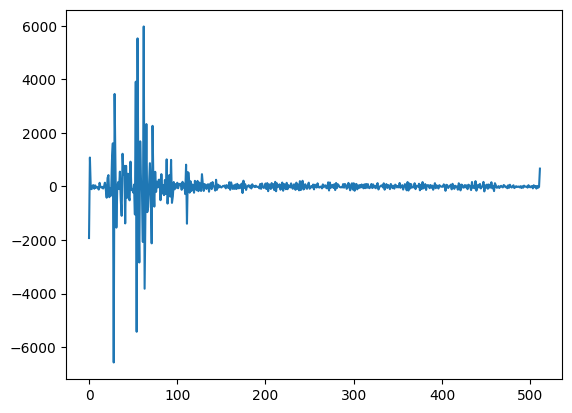

In [7]:
plt.plot(fft_chunk[0, 0, 0, :])
plt.show()

KeyboardInterrupt: 

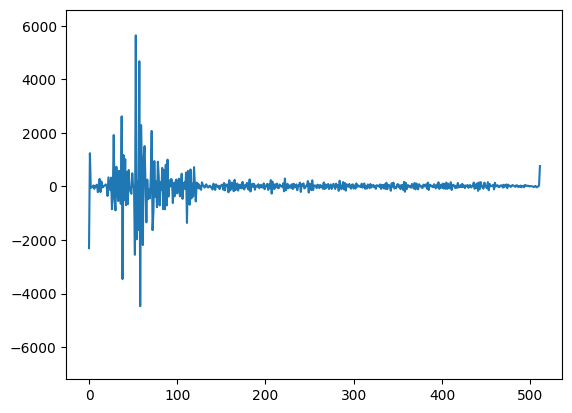

In [10]:
show_animated_plot(fft_chunk)

-------------------------------------------------------------------------------

In [11]:
frame_length = 1
chirp_checkpoint = None
frame_checkpoint = None
# background_path = _get_radar_filenames('2023_03_21_background', radar_dir=RADAR_DIR)[0]
wiatrak = _get_radar_filenames('2023_03_21_wiatrak_1m', radar_dir=RADAR_DIR)[0]

# background = _load_file(frame_length, chirp_checkpoint, frame_checkpoint, background_path)
wiatrak = _load_file(frame_length, chirp_checkpoint, frame_checkpoint, wiatrak)

# background_analytic = _to_analytic(background)
wiatrak_analytic = _to_analytic(wiatrak)

# background_fft = _chunk_to_fft(background_analytic)
wiatrak_fft = _chunk_to_fft(wiatrak_analytic)

In [12]:
# show_animated_plot(background_fft)

KeyboardInterrupt: 

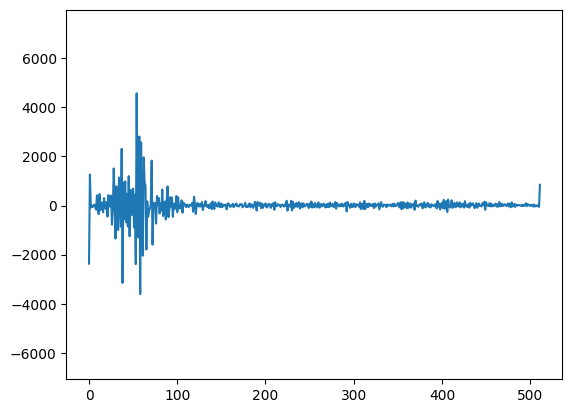

In [13]:
show_animated_plot(wiatrak_fft)